<a href="https://colab.research.google.com/github/SathishRathod7/PRODIGY-Task2/blob/main/prodigy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/titanic dataset.zip')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [ ]:
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Summary statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


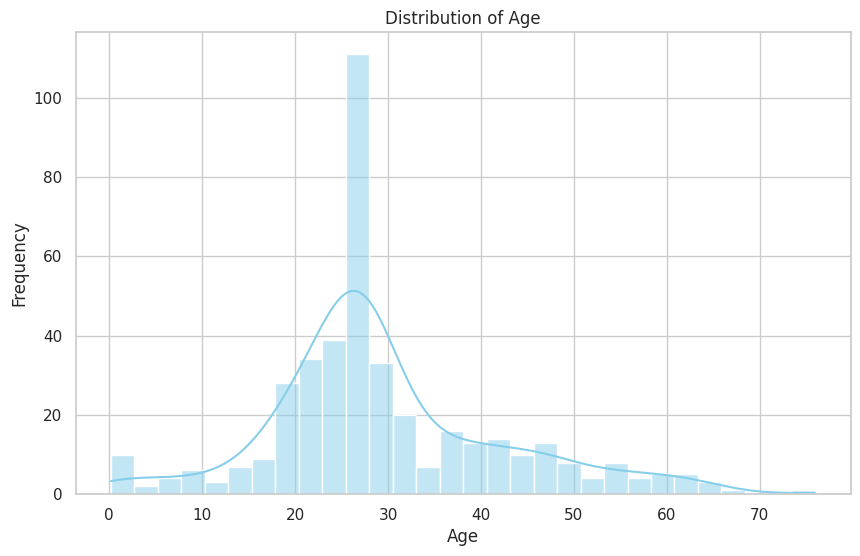

In [ ]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

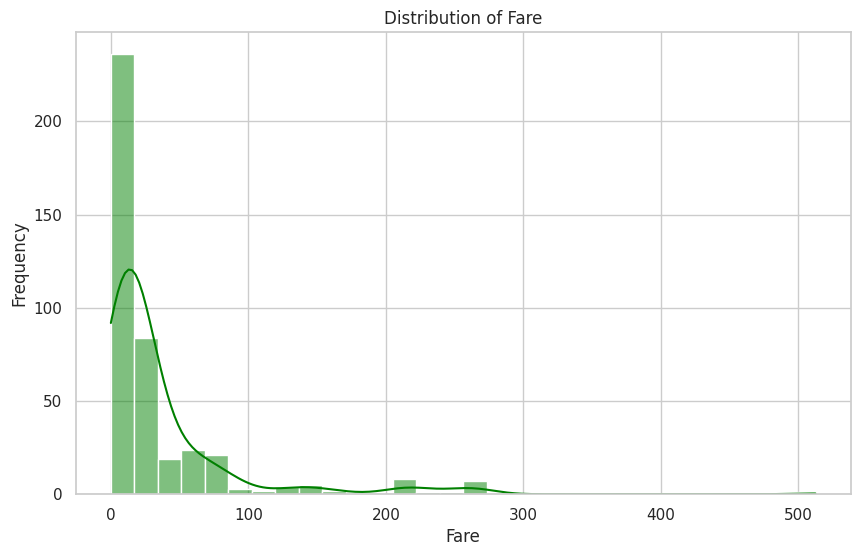

In [ ]:
# Histogram for Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

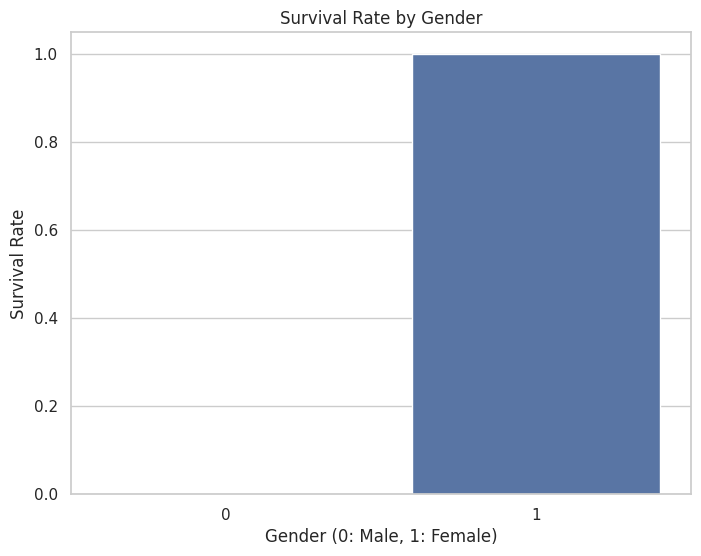

In [ ]:
# Bar plot for survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-23-cb85560464aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


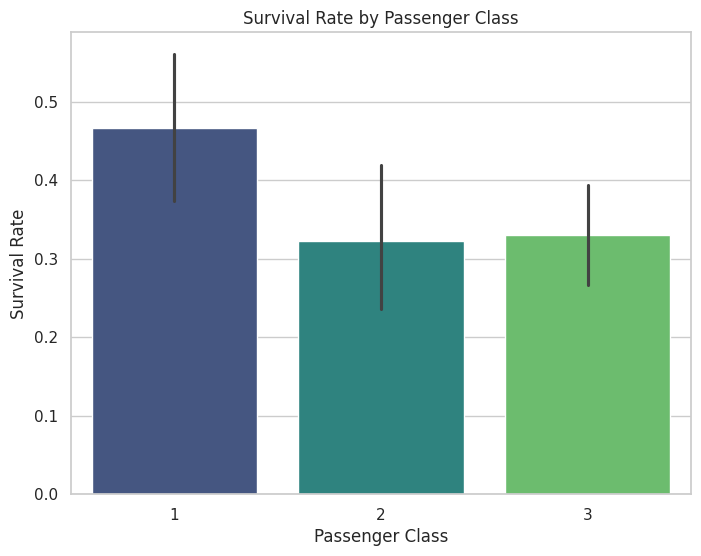

In [ ]:
# Bar plot for survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-22-c9df627c7fda>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
<ipython-input-22-c9df627c7fda>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)


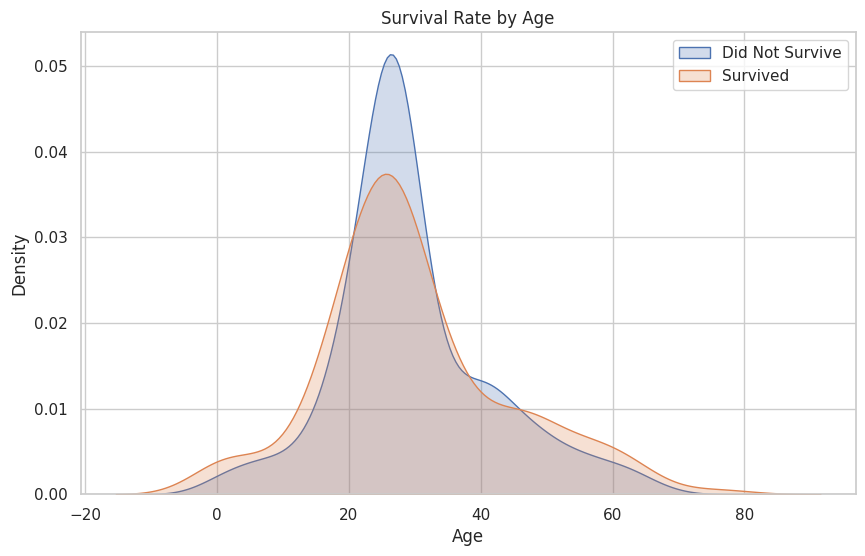

In [ ]:
# Plotting survival rate by age
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

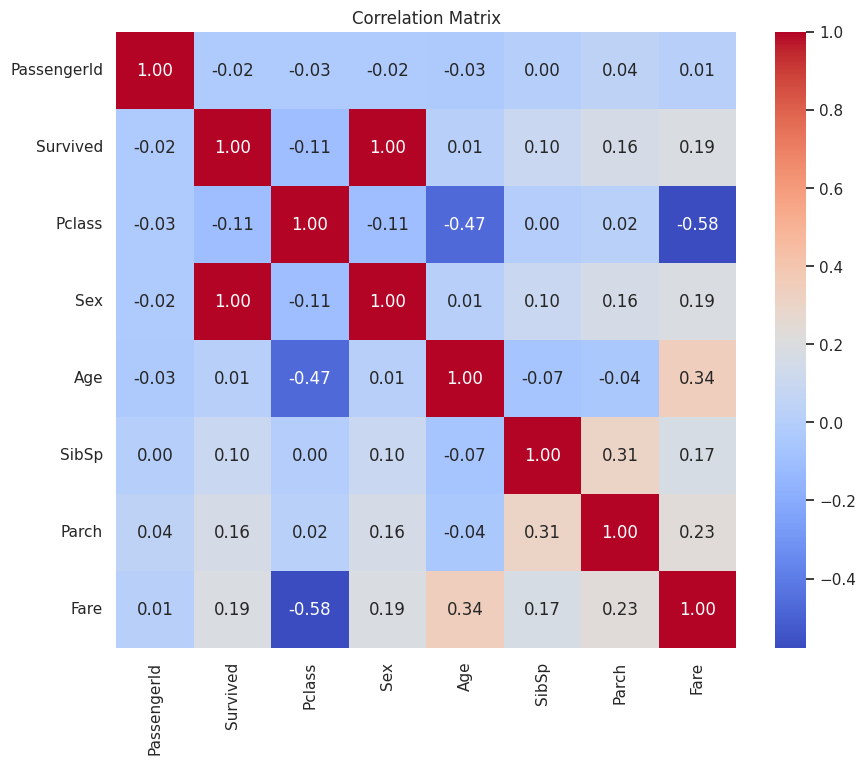

In [ ]:
# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
